## Importing the Libraries

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing
'exec(% matplotlib inline)'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

## Reading the Dataset and Preprocessing the Data

In [2]:
disease_df = pd.read_csv("framingham.csv") #read the dataset.
disease_df.drop(['education'], inplace = True, axis = 1) #drop the 'education' column directly in the dataframe.
disease_df.rename(columns={'male': 'Sex_Male'}, inplace = True) #rename the column 'male' to 'Sex_Male'.

In [3]:
disease_df.dropna(axis = 0, inplace=True) #drop the cloumns containing NaN values directly in the Dataframe.
print(disease_df.head(), disease_df.shape) #print the head() to check the dataset's first 5 rows(Since how many number of rows needs to be shown is not written) as well as the shape/dimensions of the dataset.
print(disease_df.TenYearCHD.value_counts()) #print the counts of the unique values in the 'TenYearCHD' column(only 0s and 1s are present so its showing the count of occurances of those 2 values).

   Sex_Male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0         1   39              0         0.0     0.0                0   
1         0   46              0         0.0     0.0                0   
2         1   48              1        20.0     0.0                0   
3         0   61              1        30.0     0.0                0   
4         0   46              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           

## Now Splitting the Dataset for Training and Testing

In [5]:
X = np.asarray(disease_df[['age', 'Sex_Male', 'cigsPerDay', 'totChol', 'sysBP', 'glucose']]) #saving these columns as numpy arrays for further uses
y = np.asarray(disease_df['TenYearCHD']) #saving these columns as numpy arrays for further uses

X = preprocessing.StandardScaler().fit(X).transform(X) #normalising the dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, t_test = train_test_split(X, y, test_size=0.3, random_state=4) #splitting the training and testing sets

print('Train Set', X_train.shape, y_train.shape) #printing the training set and it's shape
print("Test Set", X_test.shape, y_train.shape) #printing the testing set and it's shape

Train Set (2625, 6) (2625,)
Test Set (1126, 6) (2625,)


## Exploratory Data Analysis of Heart Disease Dataset

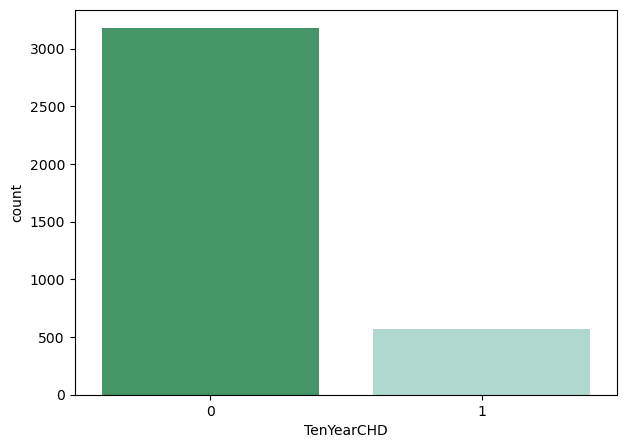

In [6]:
plt.figure(figsize=(7, 5)) #define the plot's size
sns.countplot(x = 'TenYearCHD', data=disease_df, palette="BuGn_r") #plotting the count of 0s and 1s in the 'TenYearCHD' column
plt.show()